<center><h1>Python for Data Analysis and Scientific Computing</h1></center>
<center><h2>Final Project</h2></center>
<center> By Sebastien Mascha and Thomas Le Couédic </center>
<center><i> s.mascha@berkeley.edu | tlc10@berkeley.edy </i></center>

# Project Objective and data
The problem of authentication of published information and who can see and share it and the risk of the unwanted malicious users represent a real privacy problem for the user, (OSN)s try to manage users’ privacy by using “privacy settings” for the services in many cases , but in fact a new violations ranging from identity theft up to personal information exposure are disclosed daily with the ease of re-uploading and re-publishing a user’s images, without informing the real owner, this will harm the owner both social and economically.

Generally, steganography is used to embed data into multimedia (images, audio or video)

The implemented technique includes two stages, hashing and embedding ; in hashing the (SHA) algorithm will encrypt signature of the user to obtain hash value, while embedding will embed the hash value into the image ,that’s how the technique will guarantee that no signed images could be re-upload by other users.

## Table of Contents
1. Pre-processing (image info, formatting, check for existing metadata)
1. Image transformation (filters, interpolation, data augmentation, crop)
1. Steganography (encode metadata in the image, Compare original and encoded images)

## Packaging
- PyPi: URL_TBD

`pip install steganography_tools`

- GitHub: https://github.com/sebastienmascha/data-science-webapp-steganography

# Implementation
**Importations**

In [2]:
__version__ = "1.0"
__author__ = "Sebastien Mascha, Thomas Le Couedic"
__email__ = "s.mascha@berkeley.edu, tlc10@berkeley.edu"

In [3]:
import statistics
import sys
print("Python and compiler version:")
print(sys.version)

# Provides n-dimensional array object
import numpy as np
# Data analysis and manipulation tool
import pandas as pd
# Fundamental package for scientific computing
import scipy
from scipy import ndimage

# Plotting library
%matplotlib inline
import matplotlib as mpl
# State-based interface to matplotlib
import matplotlib.pyplot as plt

# Data Mining and Machine Learning
#from sklearn import datasets
import cv2
print("\nOpenCV version: " + cv2.__version__)
# The Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter.
import PIL
print("\nPIL version: " + PIL.__version__)
from PIL import Image, ExifTags
#import tensorflow as tf
#print("TensorFlow version: " + tf.__version__)

Python and compiler version:
3.8.1 (default, Feb  2 2020, 08:49:34) 
[GCC 8.3.0]

OpenCV version: 4.5.1

PIL version: 8.2.0


In [4]:
# pip install steganography_tools

# Install local packages
! pip uninstall -y /app/packages/steganography_tools/dist/steganography_tools-0.1.0-py3-none-any.whl
! pip install /app/packages/steganography_tools/dist/steganography_tools-0.1.0-py3-none-any.whl

Processing /app/packages/steganography_tools/dist/steganography_tools-0.1.0-py3-none-any.whl


In [5]:
from steganography_tools import st
from steganography_tools import image_processing as st_processing

In [31]:
TEST_PHOTO = "image.jpg"
TEST_PHOTO_GRAYSCALE = "image_grayscale.jpg"

# Pre-processing

Filename :  image.jpg
Format :  JPEG
Mode :  RGB
Size :  (480, 361)
Width :  480
Height :  361
Image Palette :  None




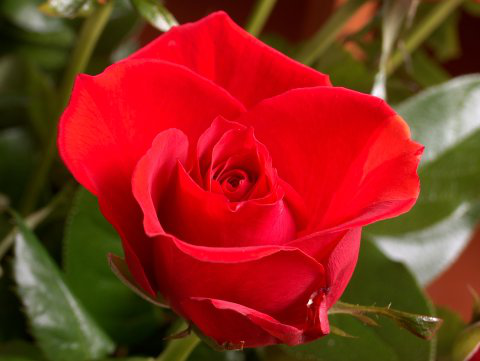

In [7]:
# This function allows us to get the basic information of an image
st_processing.img_information(TEST_PHOTO)

In [8]:
# Check for potential metadata
st_processing.get_metadata(TEST_PHOTO)

{'Software': 'Picasa',
 'Orientation': 1,
 'YCbCrSubSampling': (2, 2),
 'ExifOffset': 70,
 'ExifVersion': b'0220',
 'ExifImageWidth': 480,
 'ExifImageHeight': 361}

# Image Transformation

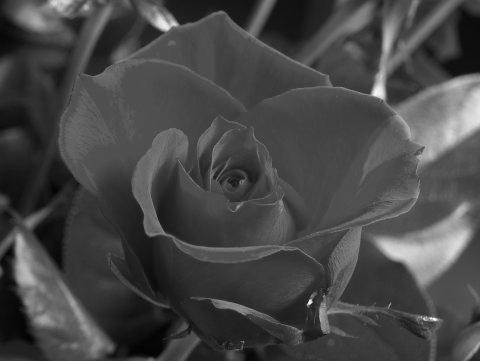

In [32]:
st_processing.rgb2grayscale(TEST_PHOTO_GRAYSCALE)

In [10]:
TEST_PHOTO = cv2.imread(TEST_PHOTO) 
print("Type: ",type(TEST_PHOTO))
TEST_PHOTO = TEST_PHOTO[:,:,0]

Type:  <class 'numpy.ndarray'>


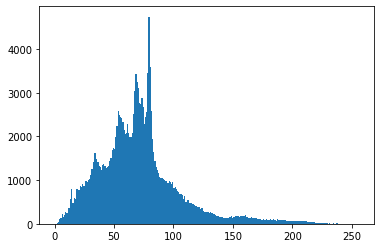

In [11]:
st_processing.plot_histogram(TEST_PHOTO)

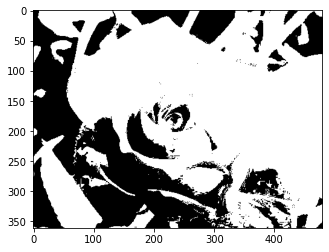

In [24]:
st_processing.thresholding(TEST_PHOTO, 55)

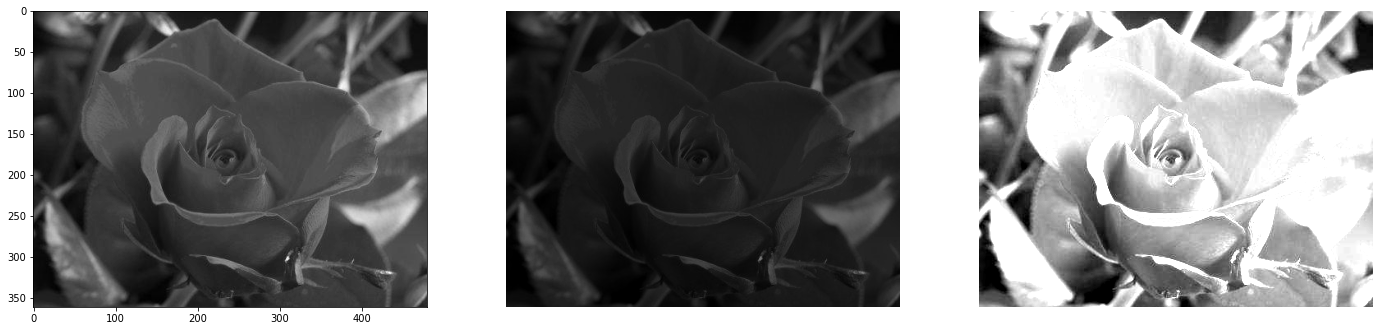

In [13]:
#Left to right : grayscale image | contrast increased
st_processing.display_images(TEST_PHOTO)

[[24 26 29 ... 71 74 77]
 [24 26 29 ... 68 71 73]
 [25 27 30 ... 65 68 69]
 ...
 [53 53 52 ... 44 47 48]
 [57 57 56 ... 43 41 35]
 [56 57 57 ... 38 39 39]]


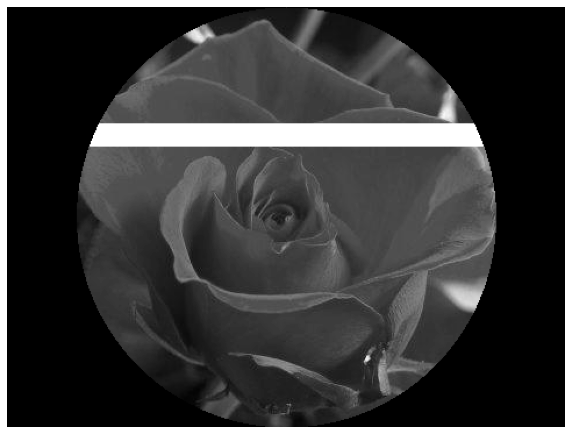

In [29]:
# Image manipulation and numpy arrays
st_processing.image_manipulation("image_grayscale.jpg")

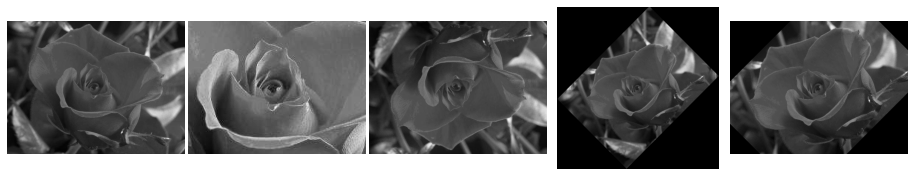

In [15]:
# Geometrical transformations
st_processing.geo_transfomation(TEST_PHOTO)

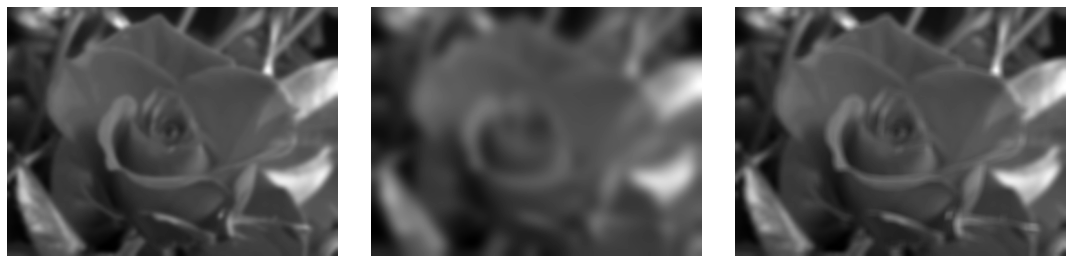

In [16]:
# Blurring
st_processing.blurring(TEST_PHOTO)

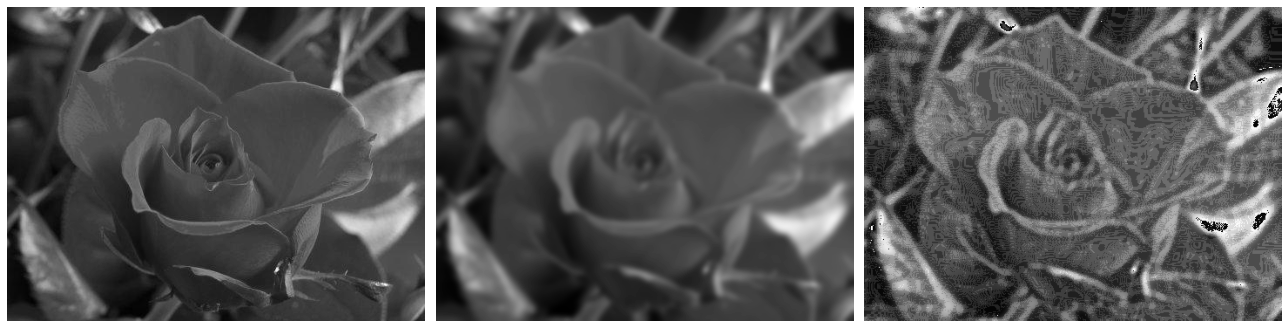

In [17]:
# Sharpenning
st_processing.sharpenning(TEST_PHOTO)

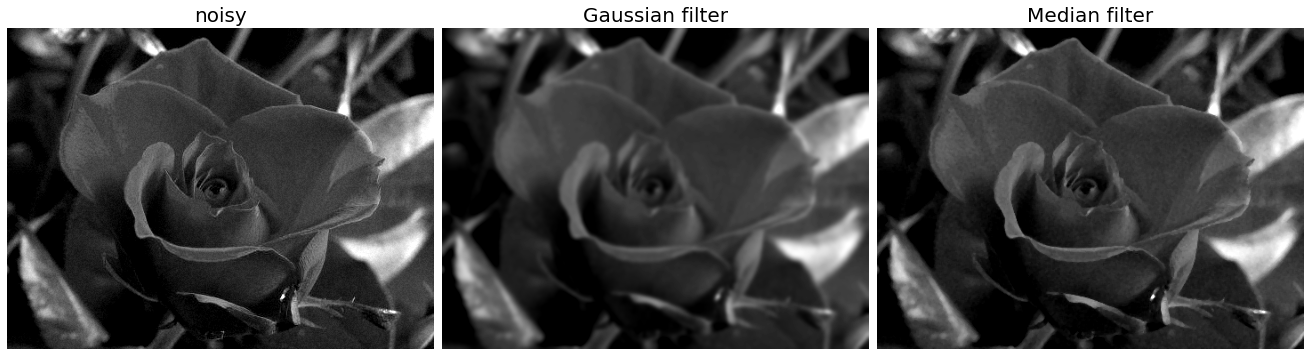

In [18]:
# Denoising
st_processing.denoising(TEST_PHOTO)

# Steganography
**Available formats**
- PNG
- JPEG

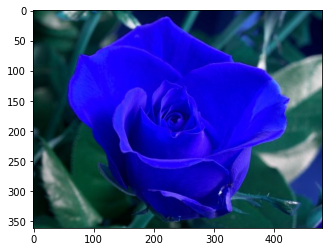

In [19]:
# Encoding
steg = st.LSBSteganography(cv2.imread("image.jpg"))
img_encoded = steg.encode_text("my message")
cv2.imwrite("image_enc.png", img_encoded)
plt.imshow(img_encoded)

In [20]:
# Decoding
im = cv2.imread("image_enc.png")
steg = st.LSBSteganography(im)
print("Text value:",steg.decode_text())

Text value: my message


## Compare original and encoded images

In [21]:
original = cv2.imread('image.jpg')
lsbEncoded = cv2.imread("image_enc.png")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
lsb_encoded_img = cv2.cvtColor(lsbEncoded, cv2.COLOR_BGR2RGB)

compare_images = st.Compare(original, lsb_encoded_img)
compare_images.get_results()

meanSquareError: 0.0003116343490304709
psnr: 83.19435040326186
